In [33]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as pyplot
%matplotlib inline
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
from Evaluation.Evaluator import EvaluatorHoldout

ModuleNotFoundError: No module named 'Cython'

In [17]:
dataset = pd.read_csv('../Input/interactions_and_impressions.csv')
dataset = dataset.drop(columns=['Impressions'])

datasetCOO = sp.coo_matrix((dataset["Data"].values, (dataset["UserID"].values, dataset["ItemID"].values)))
userIDS = dataset['UserID'].unique()
itemIDS = dataset['ItemID'].unique()

URM = np.zeros((len(userIDS), len(itemIDS)), dtype=int)
for x in range(len(datasetCOO.data)):
    if datasetCOO.data[x] == 0:
        URM[datasetCOO.row[x]][datasetCOO.col[x]] = int(1)

URM = sp.csr_matrix(URM)

/var/folders/tt/9v6608x550n51759gpcrffsc0000gn/T/ipykernel_58848/4045740091.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('../Input/interactions_and_impressions.csv')


In [18]:
URM_train, URM_test = split_train_in_two_percentage_global_sample(URM, train_percentage = 0.80)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train, train_percentage = 0.80)

In [19]:
evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

EvaluatorHoldout: Ignoring 2735 ( 6.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 1555 ( 3.7%) Users that have less than 1 test interactions


## Number of Neighbors

In [22]:
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender

x_tick = [10, 25, 40, 50, 100]
MAP_per_k = []

for topK in x_tick:

    recommender = ItemKNNCFRecommender(URM_train)
    recommender.fit(shrink=0.0, topK=topK)

    result_df, _ = evaluator_validation.evaluateRecommender(recommender)

    MAP_per_k.append(result_df.loc[10]["MAP"])

ItemKNNCFRecommender: URM Detected 6 ( 0.0%) users with no interactions.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 24507 (100.0%), 1616.49 column/sec. Elapsed time 15.16 sec
EvaluatorHoldout: Processed 38894 (100.0%) in 14.05 sec. Users per second: 2767
ItemKNNCFRecommender: URM Detected 6 ( 0.0%) users with no interactions.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 24507 (100.0%), 1566.52 column/sec. Elapsed time 15.64 sec
EvaluatorHoldout: Processed 38894 (100.0%) in 14.36 sec. Users per second: 2709
ItemKNNCFRecommender: URM Detected 6 ( 0.0%) users with no interactions.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 24507 (100.0%), 1549.46 column/sec. Elapsed time 15.82 sec
EvaluatorHoldout: Processed 38894 (100.0%) in 14.67 sec. Users per second: 2651
ItemKNNCFRecommender: URM Detected 6 ( 0.0%) users with no interactions.
Unable to load Cython Compute_Similarity, reverting

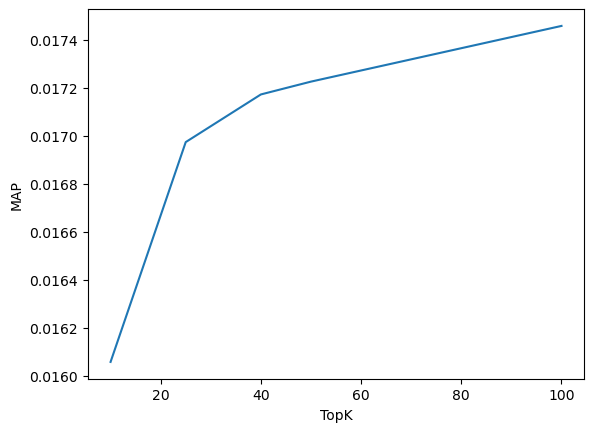

In [23]:
pyplot.plot(x_tick, MAP_per_k)
pyplot.ylabel('MAP')
pyplot.xlabel('TopK')
pyplot.show()

Let's take topK=23

## Shrinkage

In [24]:
x_tick = [0, 10, 50, 100, 200]
MAP_per_shrinkage = []

for shrink in x_tick:

    recommender = ItemKNNCFRecommender(URM_train)
    recommender.fit(shrink=shrink, topK=100)

    result_df, _ = evaluator_validation.evaluateRecommender(recommender)

    MAP_per_shrinkage.append(result_df.loc[10]["MAP"])

ItemKNNCFRecommender: URM Detected 6 ( 0.0%) users with no interactions.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 24507 (100.0%), 1632.31 column/sec. Elapsed time 15.01 sec
EvaluatorHoldout: Processed 38894 (100.0%) in 17.25 sec. Users per second: 2255
ItemKNNCFRecommender: URM Detected 6 ( 0.0%) users with no interactions.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 24507 (100.0%), 1603.38 column/sec. Elapsed time 15.28 sec
EvaluatorHoldout: Processed 38894 (100.0%) in 17.55 sec. Users per second: 2216
ItemKNNCFRecommender: URM Detected 6 ( 0.0%) users with no interactions.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 24507 (100.0%), 1632.11 column/sec. Elapsed time 15.02 sec
EvaluatorHoldout: Processed 38894 (100.0%) in 18.83 sec. Users per second: 2066
ItemKNNCFRecommender: URM Detected 6 ( 0.0%) users with no interactions.
Unable to load Cython Compute_Similarity, reverting

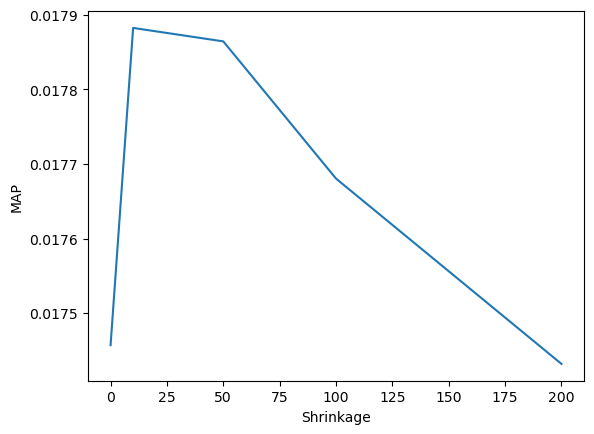

In [25]:
pyplot.plot(x_tick, MAP_per_shrinkage)
pyplot.ylabel('MAP')
pyplot.xlabel('Shrinkage')
pyplot.show()

Let's take shrinkage = 100

## Testing of reccomenders

In [32]:
collaborative_recommender1 = ItemKNNCFRecommender(URM_train)
# collaborative_recommender1.fit(shrink=10, topK=20)

collaborative_recommender2 = ItemKNNCFRecommender(URM_train)
# collaborative_recommender2.fit(shrink=100, topK=25)

collaborative_MAP1 = []
collaborative_MAP2 = []

x_tick = []

for topK in [20, 25]:
    for shrink in [10, 100]:
        x_tick.append("topk {}, shrink {}".format(topK, shrink))

        collaborative_recommender1.fit(shrink=shrink, topK=topK)
        collaborative_recommender2.fit(shrink=shrink, topK=topK)

        result_df, _ = evaluator_test.evaluateRecommender(collaborative_recommender1)
        collaborative_MAP1.append(result_df.loc[10]["MAP"])

        result_df, _ = evaluator_test.evaluateRecommender(collaborative_recommender2)
        collaborative_MAP2.append(result_df.loc[10]["MAP"])

ItemKNNCFRecommender: URM Detected 6 ( 0.0%) users with no interactions.
ItemKNNCFRecommender: URM Detected 6 ( 0.0%) users with no interactions.
Unable to load Cython Compute_Similarity, reverting to Python


KeyboardInterrupt: 

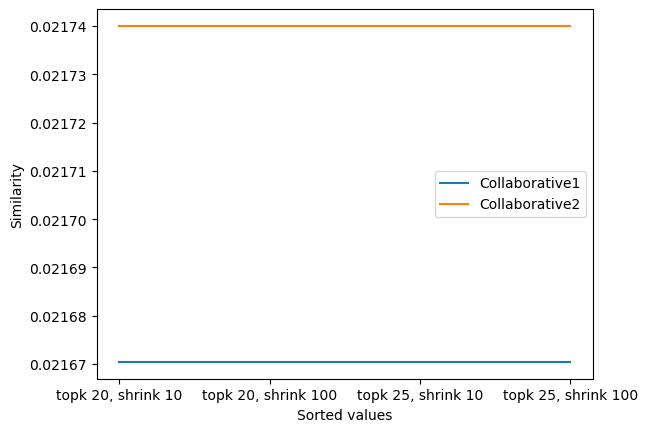

In [31]:
pyplot.plot(x_tick, collaborative_MAP1, label="Collaborative1")
pyplot.plot(x_tick, collaborative_MAP2, label="Collaborative2")

pyplot.ylabel('Similarity')
pyplot.xlabel('Sorted values')
pyplot.legend()
pyplot.show()